# 1. Predicting diabetes likelihood based on demographic and health data, using machine learning

Approach:

1. Problem definition
2. Dictionary
3. Importing libraraies and Data
4. Exploratory Data Analysis
5. Evaluation
6. Features
7. Modelling
8. Experimentation
9. Deploying in app

## 1. Problem Definition
> Given clinical parameters about a patient and their demographics, can we predict whether or not they are likley to have diabates?

 ## 2. Diabetes Dataset Data Dictionary 
 
 Data Dictionary

1. **year**: 
   - **Description**: The year in which the data was collected.
   - **Type**: Integer

2. **gender**: 
   - **Description**: The sex of the individual (1= Male; 0 = Female).
   - **Type**: Categorical

3. **age**: 
   - **Description**: The age of the individual in years.
   - **Type**: Integer

4. **location**: 
   - **Description**: The geographical area where the individual resides (e.g., city, state).
   - **Type**: Categorical

5. **race:AfricanAmerican**: 
   - **Description**: Indicates whether the individual identifies as African American (Yes/No).
   - **Type**: Categorical

6. **race:Asian**: 
   - **Description**: Indicates whether the individual identifies as Asian (Yes/No).
   - **Type**: Categorical

7. **race:Caucasian**: 
   - **Description**: Indicates whether the individual identifies as Caucasian (Yes/No).
   - **Type**: Categorical

8. **race:Hispanic**: 
   - **Description**: Indicates whether the individual identifies as Hispanic (Yes/No).
   - **Type**: Categorical

9. **race:Other**: 
   - **Description**: Indicates whether the individual identifies with a race not listed above (Yes/No).
   - **Type**: Categorical

10. **hypertension**: 
    - **Description**: Indicates if the individual has high blood pressure (Yes/No).
    - **Type**: Categorical

11. **heart_disease**: 
    - **Description**: Indicates if the individual has a history of heart disease (Yes/No).
    - **Type**: Categorical

12. **smoking_history**: 
    - **Description**: Indicates if the individual has a history of smoking (e.g., Never, Former, Current).
    - **Type**: Categorical

13. **bmi**: 
    - **Description**: Body Mass Index, a measure of body fat based on height and weight.
    - **Type**: Float (decimal)

14. **hbA1c_level**: 
    - **Description**: A measure of average blood sugar levels over the past 2-3 months, expressed as a percentage.
    - **Type**: Float (decimal)

15. **blood_glucose_level**: 
    - **Description**: The current level of glucose in the blood, typically measured in mg/dL.
    - **Type**: Float (decimal)

16. **diabetes**: 
    - **Description**: Indicates whether the individual has been diagnosed with diabetes (Yes/No).
    - **Type**: Categorical

### Purpose of the Dataset

This dataset aims to collect and analyze various factors associated with diabetes and its related health conditions. By understanding the demographics, health history, and other relevant metrics, researchers and healthcare professionals can identify patterns and risk factors associated with diabetes.



## 3. Importing dataset and libraries

In [1]:
#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models from SKlearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [13]:
#Loadind data
df = pd.read_csv(r"C:\Users\Dell\Desktop\SDS-Predicting_diabites\SDS-CP011-predicting-diabetes\data\diabetes.csv")
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


In [4]:
# Function to categorize smoking history
def categorize_smoking_history(value):
    if value in ['current', 'former', 'not current']:
        return 1
    elif value in ['ever', 'never', 'no info']:
        return 0
    else:
        return None  # Handle any unexpected values

# Apply the function
df['smoking_binary'] = df['smoking_history'].apply(categorize_smoking_history)


# Apply the function
df['smoking_binary'] = df['smoking_history'].apply(categorize_smoking_history)


# Combine original dataframe with one-hot encoded columns
df = pd.concat([df], axis=1)
#df = df.drop(columns=['smoking_1.0'])
print(df)


       year  gender   age location  race:AfricanAmerican  race:Asian  \
0      2020  Female  32.0  Alabama                     0           0   
1      2015  Female  29.0  Alabama                     0           1   
2      2015    Male  18.0  Alabama                     0           0   
3      2015    Male  41.0  Alabama                     0           0   
4      2016  Female  52.0  Alabama                     1           0   
...     ...     ...   ...      ...                   ...         ...   
99995  2018  Female  33.0  Wyoming                     0           0   
99996  2016  Female  80.0  Wyoming                     0           1   
99997  2018    Male  46.0  Wyoming                     0           1   
99998  2018  Female  51.0  Wyoming                     1           0   
99999  2016    Male  13.0  Wyoming                     0           0   

       race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0                   0              0           1      

In [5]:
# One-hot encoding
df_encoded = pd.get_dummies(df['location'], prefix='location', drop_first=True)

# Combine with the original dataframe (if needed)
df = pd.concat([df, df_encoded], axis=1)

# Display the resulting dataframe
print(df)


       year  gender   age location  race:AfricanAmerican  race:Asian  \
0      2020  Female  32.0  Alabama                     0           0   
1      2015  Female  29.0  Alabama                     0           1   
2      2015    Male  18.0  Alabama                     0           0   
3      2015    Male  41.0  Alabama                     0           0   
4      2016  Female  52.0  Alabama                     1           0   
...     ...     ...   ...      ...                   ...         ...   
99995  2018  Female  33.0  Wyoming                     0           0   
99996  2016  Female  80.0  Wyoming                     0           1   
99997  2018    Male  46.0  Wyoming                     0           1   
99998  2018  Female  51.0  Wyoming                     1           0   
99999  2016    Male  13.0  Wyoming                     0           0   

       race:Caucasian  race:Hispanic  race:Other  hypertension  ...  \
0                   0              0           1             0  

In [15]:
df.shape

(100000, 17)

## 4. Exploratory data analysis  (EDA)

In [6]:
#How many of each class are there
df["diabetes"].value_counts()
#We have an unbalanced classification problem

0    91500
1     8500
Name: diabetes, dtype: int64

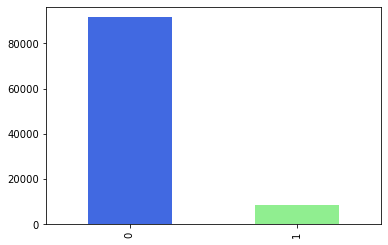

In [16]:
df["diabetes"].value_counts().plot(kind="bar", color=["royalblue", "lightgreen"]);

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [18]:
#Are there any missing values?
df.isna().sum()

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

There are no missing values in this dataset.

In [19]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Diabetes Frequency according to gender

In [20]:
df.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [21]:
#Compare target column with sex column
pd.crosstab(df.diabetes, df.gender)

gender,Female,Male,Other
diabetes,,,
0,54091,37391,18
1,4461,4039,0


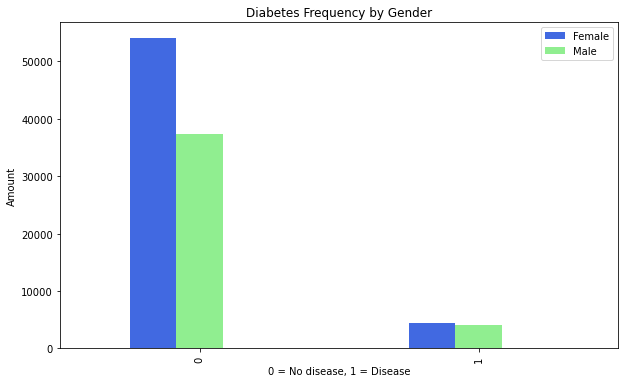

In [22]:
# Create a plot cross tab
pd.crosstab(df.diabetes, df.gender).plot(kind="bar",
                                   figsize = (10,6),
                                   color=["royalblue", "lightgreen"])

plt.title("Diabetes Frequency by Gender")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks;

As for the current dayaset, there are more female than male patients who present diabetes. Now let's move on to the other variables.

# Diabetes Frequency according to age

In [23]:
df.age.value_counts()

80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
1.00       83
0.48       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64

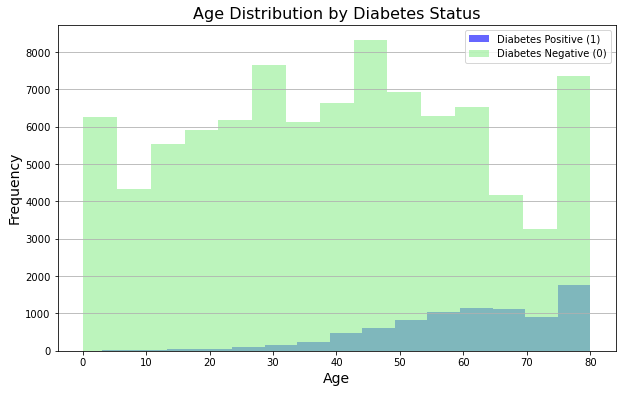

In [24]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create the histogram
plt.hist(df[df['diabetes'] == 1]['age'].dropna(), bins=15, alpha=0.6, color='blue', label='Diabetes Positive (1)')
plt.hist(df[df['diabetes'] == 0]['age'].dropna(), bins=15, alpha=0.6, color='lightgreen', label='Diabetes Negative (0)')

# Adding titles and labels
plt.title('Age Distribution by Diabetes Status', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

# Show the plot
plt.grid(axis='y')
plt.show()

As per this firs exploratory analysis, the major concentration seems to be between the ages of 50 and 60, however age does not seem as a pivotal characteristic linked to diabetes. 

# Diabetes Frequency according to hypertension presence


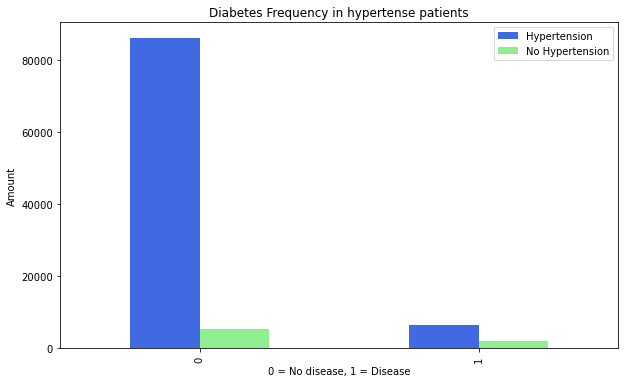

In [29]:
# Create a plot cross tab
pd.crosstab(df.diabetes, df.hypertension).plot(kind="bar",
                                   figsize = (10,6),
                                   color=["royalblue", "lightgreen"])

plt.title("Diabetes Frequency in hypertense patients")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Hypertension", "No Hypertension"])
plt.xticks;

Focusing on the patients that are positive to diabetes, it seems like a big part of them tend to present hypertension, however, at least based in this approach, these two paraemeters don't seem to corrarlete. 

Correlations will be explored later. 

# Diabetes Frequency according to heart_disease presence

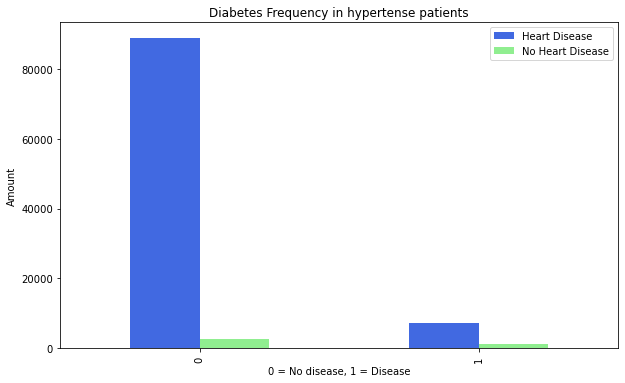

In [31]:
# Create a plot cross tab
pd.crosstab(df.diabetes, df.heart_disease).plot(kind="bar",
                                   figsize = (10,6),
                                   color=["royalblue", "lightgreen"])

plt.title("Diabetes Frequency in hypertense patients")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xticks;

Focusing on the patients that are positive to diabetes, it seems like a big part of them tend to present heart disease, however, at least based in this approach, these two paraemeters don't seem to corrarlete. 

Correlations will be explored later.

# Age vs Heart Disease for Diabetes

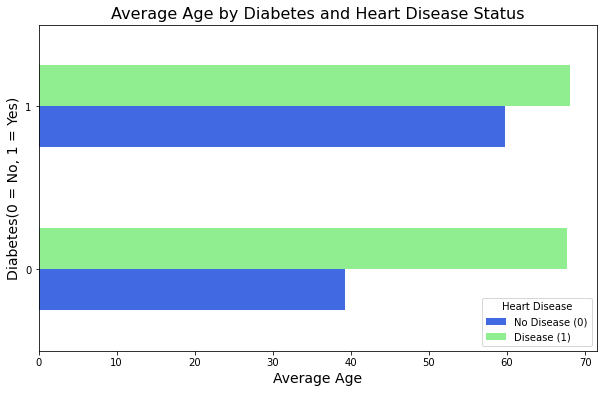

In [39]:
# Calculate average age for each combination of diabetes and heart disease
average_age = df.groupby(['diabetes', 'heart_disease'])['age'].mean().unstack()

# Create a horizontal bar plot
average_age.plot(kind='barh', color=['royalblue', 'lightgreen'], figsize=(10, 6))

# Add some helpful info
plt.title("Average Age by Diabetes and Heart Disease Status", fontsize=16)
plt.xlabel("Average Age", fontsize=14)
plt.ylabel("Diabetes(0 = No, 1 = Yes)", fontsize=14)
plt.legend(title='Heart Disease', labels=['No Disease (0)', 'Disease (1)'])

# Show the plot
plt.show();


According to this previous approach, people who present diabetes do not seem to have more heart disease issues than people who don't. In fact, both groups (healthy and sick people), seem to have the same chance to present heart disease. 

# Diabetes Frequency according to bmi

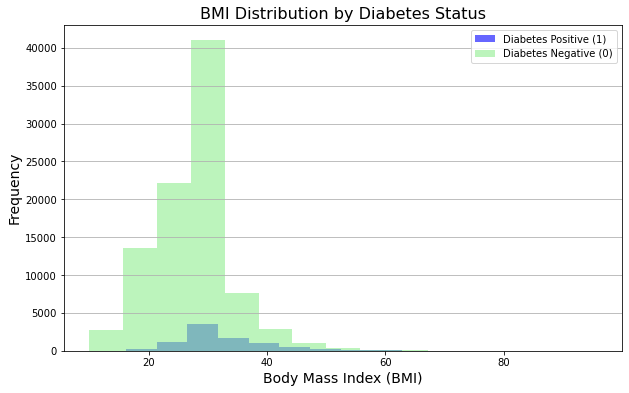

In [29]:
plt.figure(figsize=(10, 6))

# Create the histogram for BMI
plt.hist(df[df['diabetes'] == 1]['bmi'].dropna(), bins=15, alpha=0.6, color='blue', label='Diabetes Positive (1)')
plt.hist(df[df['diabetes'] == 0]['bmi'].dropna(), bins=15, alpha=0.6, color='lightgreen', label='Diabetes Negative (0)')

# Adding titles and labels
plt.title('BMI Distribution by Diabetes Status', fontsize=16)
plt.xlabel('Body Mass Index (BMI)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

# Show the plot
plt.grid(axis='y')
plt.show()

For this paraemeter, let's take into consideration the following:
* Underweight: BMI less than 18.5 kg/m^2 
* Healthy weight: BMI between 18.5 and 24.9 kg/m^2 
* Overweight: BMI between 25 and 29.9 kg/m^2 
* Obesity: BMI between 30 and 39.9 kg/m^2 
* Severe obesity: BMI greater than or equal to 40 kg/m^2

For this dataset, patients considered Obese and Overweight seem to be more likeley to test positive for diabetes. 

# Diabetes Frequency according to hbA1c_level

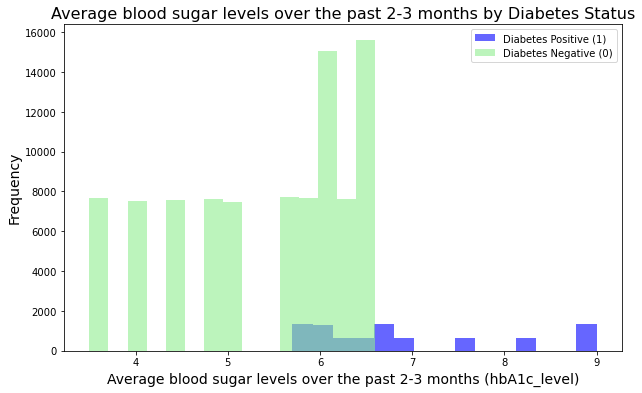

In [32]:
plt.figure(figsize=(10, 6))

# Create the histogram for hbA1c_level
plt.hist(df[df['diabetes'] == 1]['hbA1c_level'].dropna(), bins=15, alpha=0.6, color='blue', label='Diabetes Positive (1)')
plt.hist(df[df['diabetes'] == 0]['hbA1c_level'].dropna(), bins=15, alpha=0.6, color='lightgreen', label='Diabetes Negative (0)')

# Adding titles and labels
plt.title('Average blood sugar levels over the past 2-3 months by Diabetes Status', fontsize=16)
plt.xlabel('Average blood sugar levels over the past 2-3 months (hbA1c_level)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

# Show the plot

plt.show();

For this paraemter let's take into consideration the following:

HbA1c_level is a measure of average blood sugar levels over the past 2-3 months, expressed as a percentage and blood glucose levels. Taking this into consideration, for an HbA1c test to classify as normal, or in the non-diabetic range, the value must be below 5.7 %. Anyone with an HbA1c value of 5.7 % to 6.4 % is considered to be prediabetic, while diabetes can be diagnosed with a HbA1c of 6.5% or higher.

Taking into consideration the previous information, a stronger correlation between this feature and diabetees can be expected, as opposed to the previous parameters analyzed so far.


 # Diabetes Frequency according to blood glucose level

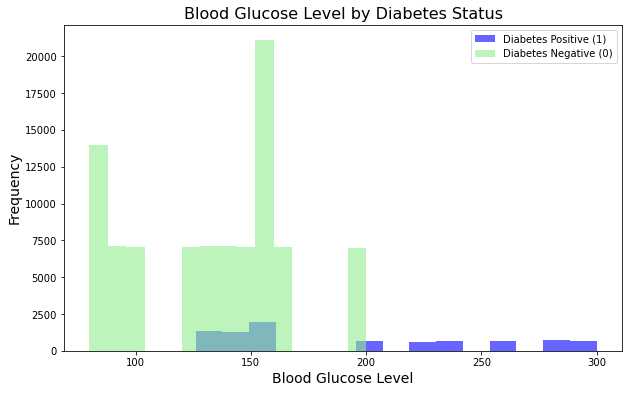

In [34]:
plt.figure(figsize=(10, 6))

# Create the histogram for Glucose Level
plt.hist(df[df['diabetes'] == 1]['blood_glucose_level'].dropna(), bins=15, alpha=0.6, color='blue', label='Diabetes Positive (1)')
plt.hist(df[df['diabetes'] == 0]['blood_glucose_level'].dropna(), bins=15, alpha=0.6, color='lightgreen', label='Diabetes Negative (0)')

# Adding titles and labels
plt.title('Blood Glucose Level by Diabetes Status', fontsize=16)
plt.xlabel('Blood Glucose Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

# Show the plot

plt.show();

For this paraemter let's take into consideration the following:

A normal fasting blood glucose level is between 70 and 100 mg/dL (3.9 and 5.6 mmol/L). A blood glucose level between 100 and 125 mg/dL (5.6 and 6.9 mmol/L) is considered prediabetes, and a level of 126 mg/dL (7.0 mmol/L) or higher on two separate tests is diagnosed as diabetes.

Taking into consideration the previous information, a stronger correlation between this feature and diabetees can be expected, as opposed to the previous parameters (safe for hbA1C-level) analyzed so far.

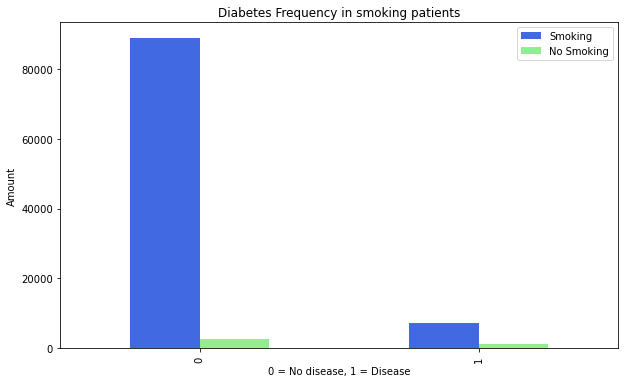

In [7]:
# Diabetes Frequency vs smoking history
# Create a plot cross tab
pd.crosstab(df.diabetes, df.heart_disease).plot(kind="bar",
                                   figsize = (10,6),
                                   color=["royalblue", "lightgreen"])

plt.title("Diabetes Frequency in smoking patients")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Smoking", "No Smoking"])
plt.xticks;

## 5. Features (Feature selection)

Clasifying diabetes

In [7]:

# Function to classify diabetes type
def classify_diabetes(row):
    if row['blood_glucose_level'] >= 126 or row['hbA1c_level'] >= 6.5:
        if row['age'] < 30:
            return pd.Series([1, 0])  # Type I
        else:
            return pd.Series([0, 1])  # Type II
    else:
        return pd.Series([0, 0])  # No Diabetes

# Apply classification and create two new columns
df[['type_I', 'type_II']] = df.apply(classify_diabetes, axis=1)

print(df)

       year  gender   age location  race:AfricanAmerican  race:Asian  \
0      2020  Female  32.0  Alabama                     0           0   
1      2015  Female  29.0  Alabama                     0           1   
2      2015    Male  18.0  Alabama                     0           0   
3      2015    Male  41.0  Alabama                     0           0   
4      2016  Female  52.0  Alabama                     1           0   
...     ...     ...   ...      ...                   ...         ...   
99995  2018  Female  33.0  Wyoming                     0           0   
99996  2016  Female  80.0  Wyoming                     0           1   
99997  2018    Male  46.0  Wyoming                     0           1   
99998  2018  Female  51.0  Wyoming                     1           0   
99999  2016    Male  13.0  Wyoming                     0           0   

       race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0                   0              0           1      

Outliers based on Z-score:
Empty DataFrame
Columns: [year, gender, age, location, race:AfricanAmerican, race:Asian, race:Caucasian, race:Hispanic, race:Other, hypertension, heart_disease, smoking_history, bmi, hbA1c_level, blood_glucose_level, diabetes, z_score]
Index: []
Outliers based on IQR:
Empty DataFrame
Columns: [year, gender, age, location, race:AfricanAmerican, race:Asian, race:Caucasian, race:Hispanic, race:Other, hypertension, heart_disease, smoking_history, bmi, hbA1c_level, blood_glucose_level, diabetes, z_score]
Index: []


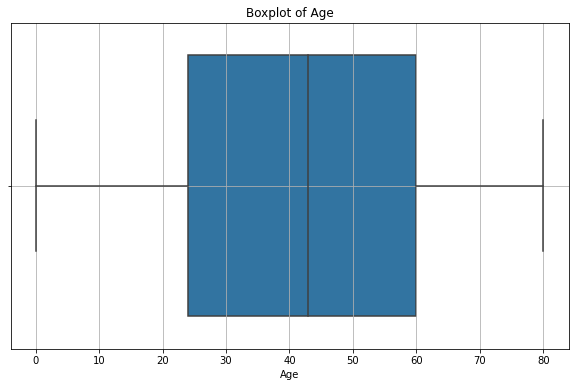

In [15]:
#Detecting outliers


# Age
# Calculate the Z-scores
df['z_score'] = (df['age'] - df['age'].mean()) / df['age'].std()

# Define a threshold for Z-score
threshold = 3  # Commonly used threshold

# Identify outliers
outliers_z_score = df[np.abs(df['z_score']) > threshold]

print("Outliers based on Z-score:")
print(outliers_z_score)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

print("Outliers based on IQR:")
print(outliers_iqr)

#Boxplot visualization

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()





count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64


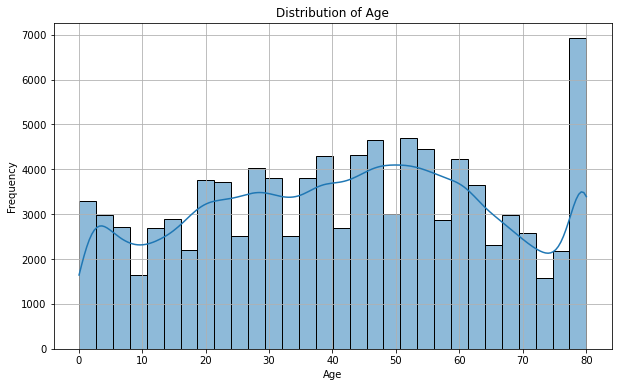

In [16]:
# Check basic statistics
print(df['age'].describe())

# Check the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Age seems pretty uniform, being the mean for testing positive for diabetes 41 years old. No signs of outliers for Age variable.

Outliers based on Z-score:
       year  gender   age location  race:AfricanAmerican  race:Asian  \
14     2016  Female  64.0  Alabama                     0           0   
67     2015  Female  42.0  Alabama                     0           1   
182    2015  Female  62.0  Alabama                     0           0   
305    2016  Female  38.0  Alabama                     0           0   
320    2015  Female  29.0  Alabama                     0           1   
...     ...     ...   ...      ...                   ...         ...   
99675  2015    Male  15.0  Wyoming                     0           0   
99686  2015  Female  36.0  Wyoming                     0           0   
99739  2015    Male  52.0  Wyoming                     0           1   
99828  2016  Female  59.0  Wyoming                     0           0   
99970  2016  Female  58.0  Wyoming                     0           0   

       race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
14                  0      

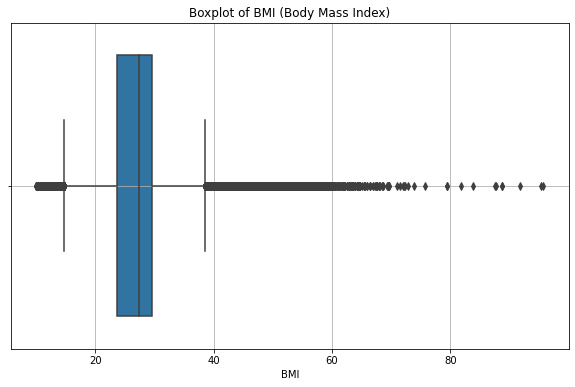

In [26]:
#Detecting outliers


# BMI
# Calculate the Z-scores
df['z_score'] = (df['bmi'] - df['bmi'].mean()) / df['bmi'].std()

# Define a threshold for Z-score
threshold = 3  # Commonly used threshold

# Identify outliers
outliers_z_score = df[np.abs(df['z_score']) > threshold]

print("Outliers based on Z-score:")
print(outliers_z_score)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

print("Outliers based on IQR:")
print(outliers_iqr)

#Boxplot visualization

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI (Body Mass Index)')
plt.xlabel('BMI')
plt.grid(True)
plt.show()





count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64


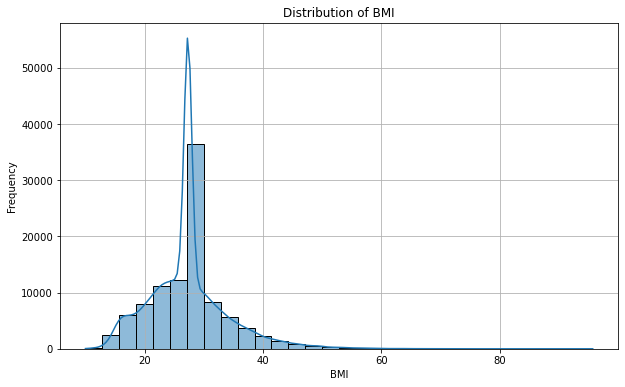

In [27]:
# Check basic statistics
print(df['bmi'].describe())

# Check the distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Body Mass Index does spresemt outliers, which is consisten with the given data in which we have positive and negative patients for diabetes. More concretly:

Z-Score Method: Outliers are those with bmi < 7.40 or bmi > 47.24.
IQR Method: Outliers are those with bmi < 14.70 or bmi > 38.50.

And what doees this mean?

- Low BMI (< 14.70):

* Individuals with a BMI below this threshold may be underweight. This could indicate malnutrition,     eating disorders, or other health issues.
* While low BMI is not directly linked to diabetes, some studies suggest that underweight individuals may have metabolic issues that could affect blood sugar regulation.

However, it's crucial to consider overall health and lifestyle, as these factors can influence diabetes risk.

- High BMI (> 47.24):

* A BMI above this threshold typically indicates severe obesity. This is a significant risk factor for various health conditions, including type 2 diabetes.
* High BMI often correlates with insulin resistance, a precursor to type 2 diabetes, meaning the body struggles to use insulin effectively.
Individuals in this category may require more frequent monitoring for diabetes and related complications.

Outliers based on Z-score:
       year  gender   age location  race:AfricanAmerican  race:Asian  \
29     2016    Male  80.0  Alabama                     1           0   
127    2016  Female  48.0  Alabama                     0           0   
132    2016    Male  71.0  Alabama                     0           0   
222    2016    Male  75.0  Alabama                     0           1   
301    2015  Female  56.0  Alabama                     1           0   
...     ...     ...   ...      ...                   ...         ...   
99620  2015  Female  80.0  Wyoming                     0           1   
99702  2015  Female  67.0  Wyoming                     0           0   
99871  2018  Female  67.0  Wyoming                     0           0   
99959  2016    Male  37.0  Wyoming                     0           0   
99977  2016    Male  58.0  Wyoming                     0           0   

       race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
29                  0      

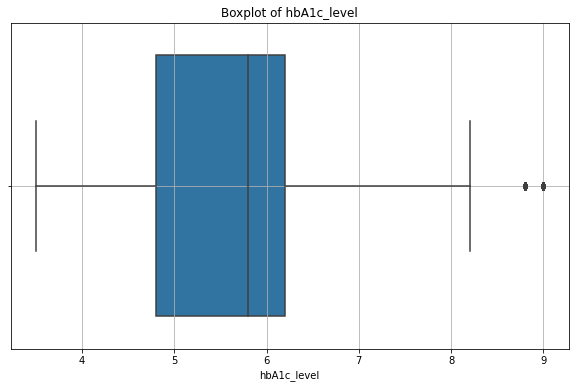

In [28]:
#Detecting outliers


# hbA1c_level
# Calculate the Z-scores
df['z_score'] = (df['hbA1c_level'] - df['hbA1c_level'].mean()) / df['hbA1c_level'].std()

# Define a threshold for Z-score
threshold = 3  # Commonly used threshold

# Identify outliers
outliers_z_score = df[np.abs(df['z_score']) > threshold]

print("Outliers based on Z-score:")
print(outliers_z_score)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['hbA1c_level'].quantile(0.25)
Q3 = df['hbA1c_level'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['hbA1c_level'] < lower_bound) | (df['hbA1c_level'] > upper_bound)]

print("Outliers based on IQR:")
print(outliers_iqr)

#Boxplot visualization

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['hbA1c_level'])
plt.title('Boxplot of hbA1c_level')
plt.xlabel('hbA1c_level')
plt.grid(True)
plt.show()





count    100000.000000
mean          5.527507
std           1.070672
min           3.500000
25%           4.800000
50%           5.800000
75%           6.200000
max           9.000000
Name: hbA1c_level, dtype: float64


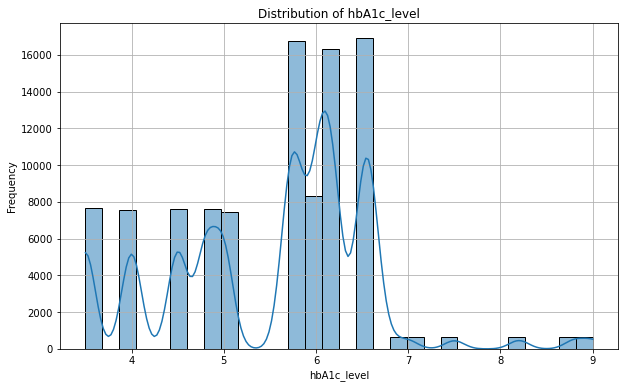

In [29]:
# Check basic statistics
print(df['hbA1c_level'].describe())

# Check the distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['hbA1c_level'], bins=30, kde=True)
plt.title('Distribution of hbA1c_level')
plt.xlabel('hbA1c_level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

For hbA1c_level feature we do have outliers, and we can summarize this as follows:

Z-Score Method:
Outliers are defined as hbA1c_level < 2.32 or hbA1c_level > 8.74.
IQR Method:
Outliers are defined as hbA1c_level < 2.70 or hbA1c_level > 8.30.

And what does this mean for diabetes?

- Low hbA1c Levels (< 2.32 or < 2.70):

* Individuals with very low hbA1c levels may require further investigation to assess their overall health and metabolic status.
* It’s essential to evaluate why the level is low, as this could pose other health risks.

- High hbA1c Levels (> 8.30 or > 8.74):
* High hbA1c levels indicate poor blood glucose control over time, which is a significant risk factor for the development of diabetes-related complications.
* Levels above 8.0% generally suggest that an individual is not managing their diabetes effectively.

Outliers based on Z-score:
       year  gender   age location  race:AfricanAmerican  race:Asian  \
112    2016    Male  53.0  Alabama                     0           0   
120    2015    Male  68.0  Alabama                     0           0   
132    2016    Male  71.0  Alabama                     0           0   
297    2015    Male  67.0  Alabama                     0           0   
301    2015  Female  56.0  Alabama                     1           0   
...     ...     ...   ...      ...                   ...         ...   
99763  2015    Male  55.0  Wyoming                     1           0   
99799  2016    Male  80.0  Wyoming                     0           1   
99865  2018    Male  79.0  Wyoming                     0           0   
99920  2016  Female  72.0  Wyoming                     0           1   
99942  2016    Male  65.0  Wyoming                     0           0   

       race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
112                 0      

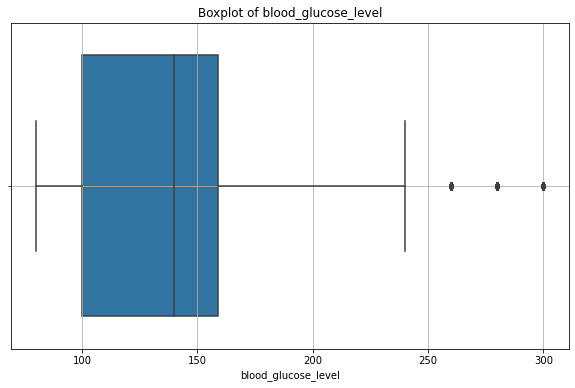

In [34]:
#Detecting outliers


# blood_glucose_level 
# Calculate the Z-scores
df['z_score'] = (df['blood_glucose_level'] - df['blood_glucose_level'].mean()) / df['blood_glucose_level'].std()

# Define a threshold for Z-score
threshold = 3  # Commonly used threshold

# Identify outliers
outliers_z_score = df[np.abs(df['z_score']) > threshold]

print("Outliers based on Z-score:")
print(outliers_z_score)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['blood_glucose_level'].quantile(0.25)
Q3 = df['blood_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['blood_glucose_level'] < lower_bound) | (df['blood_glucose_level'] > upper_bound)]

print("Outliers based on IQR:")
print(outliers_iqr)

#Boxplot visualization

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['blood_glucose_level'])
plt.title('Boxplot of blood_glucose_level')
plt.xlabel('blood_glucose_level')
plt.grid(True)
plt.show()





count    100000.000000
mean        138.058060
std          40.708136
min          80.000000
25%         100.000000
50%         140.000000
75%         159.000000
max         300.000000
Name: blood_glucose_level, dtype: float64


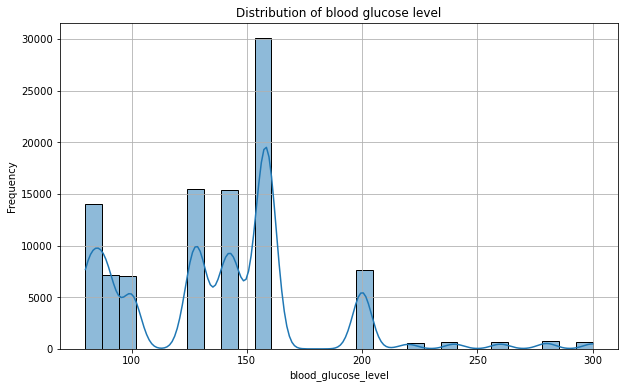

In [35]:
# Check basic statistics
print(df['blood_glucose_level'].describe())

# Check the distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['blood_glucose_level'], bins=30, kde=True)
plt.title('Distribution of blood glucose level')
plt.xlabel('blood_glucose_level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

For blood glucose level we do have outliers:

Z-Score Method:
Outliers are defined as blood_glucose_level < 15.93 or blood_glucose_level > 260.19.
IQR Method:
Outliers are defined as blood_glucose_level < 11.50 or blood_glucose_level > 247.50.

This means that patients with:

- Blood Glucose Levels < 15.93 (Z-Score) / < 11.50 (IQR):

* Have extremely low blood glucose levels, which can indicate hypoglycemia. This condition is characterized by dangerously low glucose levels in the blood, which can lead to symptoms such as dizziness, confusion, sweating, rapid heartbeat, and even loss of consciousness.

- Blood Glucose Levels > 260.19 (Z-Score) / > 247.50 (IQR):

* Have elevated blood glucose which suggests hyperglycemia (a key indicator of poorly controlled diabetes).
* Chronic hyperglycemia can lead to serious complications, including:
  * Diabetic ketoacidosis (DKA), especially in type 1 diabetes
  * Long-term complications such as cardiovascular disease, kidney damage, neuropathy, and retinopathy

In [8]:
#Make correlation matrix
df.corr()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,smoking_binary,type_I,type_II
year,1.000000,-0.003304,-0.004291,-0.007224,0.010587,0.004153,-0.003172,-0.003806,0.001820,-0.001861,-0.000465,0.002968,-0.003464,0.003807,0.002701,0.001719
age,-0.003304,1.000000,-0.002183,0.003787,0.003790,0.001962,-0.007336,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008,0.135161,-0.663144,0.604033
race:AfricanAmerican,-0.004291,-0.002183,1.000000,-0.251859,-0.250765,-0.250860,-0.251725,-0.001201,-0.000664,-0.001249,0.001312,0.002292,0.004378,-0.003473,0.003526,0.000646
race:Asian,-0.007224,0.003787,-0.251859,1.000000,-0.249148,-0.249241,-0.250102,0.003977,0.006166,0.005240,-0.000473,0.000171,0.003739,-0.003736,-0.001669,-0.000704
race:Caucasian,0.010587,0.003790,-0.250765,-0.249148,1.000000,-0.248159,-0.249015,0.000503,-0.001225,-0.002114,-0.004033,0.004121,-0.001749,0.000830,-0.002210,0.005257
race:Hispanic,0.004153,0.001962,-0.250860,-0.249241,-0.248159,1.000000,-0.249109,0.001369,-0.000771,0.002363,0.000446,-0.002684,-0.001301,0.006628,-0.001855,0.000476
race:Other,-0.003172,-0.007336,-0.251725,-0.250102,-0.249015,-0.249109,1.000000,-0.004641,-0.003510,-0.004236,0.002735,-0.003905,-0.005095,-0.000217,0.002185,-0.005664
hypertension,-0.003806,0.251171,-0.001201,0.003977,0.000503,0.001369,-0.004641,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823,0.021965,-0.153537,0.160790
heart_disease,0.001820,0.233354,-0.000664,0.006166,-0.001225,-0.000771,-0.003510,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727,0.064714,-0.114119,0.117154
bmi,-0.001861,0.337396,-0.001249,0.005240,-0.002114,0.002363,-0.004236,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357,0.048321,-0.296383,0.283743


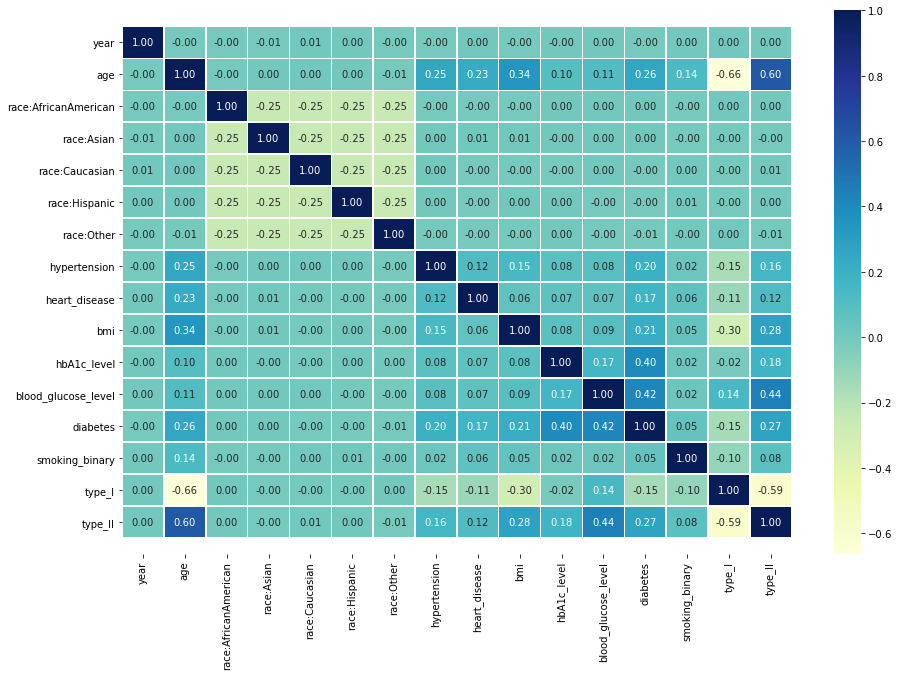

In [9]:
#Making a correlation matrix more understandable with heatmap
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth = 0.5,
                fmt=".2f",
                cmap = "YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top = -0.5);

Taking into consideration that the values closer to one determine strong correlation, the ones that show stronger correlation to diabetes are **hbA1c_level**, which is a measure of average blood sugar levels over the past 2-3 months, expressed as a percentage and blood glucose levels. However, when taking a closer look by type of diabetes, age now comes into play. 

It is also important to note that we have some negative relationships in the matrix, which indicate inverse relationship between the variables that are being correlated. This indicates that as one factor increases, the other decreases. However, this is not referrencing causation, rather other factors not stated in the data may be at play when analysing those features. As for our present dataset, those features are demeed as weak.

As a first approach, we could discard some features like smoking, hearat diseaase, and hypetension, but let's take it even further with the Filter Method to make sure we choose the best features for our model.

In [12]:
# Filter Method


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set a correlation threshold
threshold = 0.3  # Since it often helps to filter out less significant features while still capturing some important ones.

# Select features based on the correlation with 'type_I' and 'type_II'
features_type_I = correlation_matrix['type_I'][correlation_matrix['type_I'].abs() > threshold].index.tolist()
features_type_II = correlation_matrix['type_II'][correlation_matrix['type_II'].abs() > threshold].index.tolist()
features_diabetes = correlation_matrix['diabetes'][correlation_matrix['diabetes'].abs() > threshold].index.tolist()
# Exclude the target columns themselves
features_type_I = [feature for feature in features_type_I if feature not in ['type_I', 'type_II']]
features_type_II = [feature for feature in features_type_II if feature not in ['type_I', 'type_II']]
features_diabetes = list(set(features_diabetes) | set(features_type_I) | set(features_type_II))

# Display selected features
print("Features related to diabetes:", features_diabetes)
print("Features related to Type I diabetes:", features_type_I)
print("Features related to Type II diabetes:", features_type_II)

#ask suneeta more about type I diabetes features and if this is actually a good approach.

Features related to diabetes: ['blood_glucose_level', 'age', 'diabetes', 'hbA1c_level']
Features related to Type I diabetes: ['age']
Features related to Type II diabetes: ['age', 'blood_glucose_level']


In [16]:
#Embeded method for feature selection

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Define features and target
X = df[['bmi', 'age', 'blood_glucose_level', 'hbA1c_level']]
y = df['diabetes']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and fit the Lasso model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha for regularization strength
lasso.fit(X_train, y_train)

# Get feature importance
importance = pd.Series(lasso.coef_, index=X.columns)
print("Feature Importance from Lasso Regression:")
print(importance)

# Select significant features
significant_features = importance[importance != 0].index.tolist()
print("Significant Features:", significant_features)


Feature Importance from Lasso Regression:
bmi                    0.000000
age                    0.000000
blood_glucose_level    0.015958
hbA1c_level            0.009393
dtype: float64
Significant Features: ['blood_glucose_level', 'hbA1c_level']


In [17]:
# Define features and target
X = df[['bmi', 'age', 'blood_glucose_level', 'hbA1c_level']]
y = df['type_I']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and fit the Lasso model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha for regularization strength
lasso.fit(X_train, y_train)

# Get feature importance
importance = pd.Series(lasso.coef_, index=X.columns)
print("Feature Importance from Lasso Regression:")
print(importance)

# Select significant features
significant_features = importance[importance != 0].index.tolist()
print("Significant Features:", significant_features)


Feature Importance from Lasso Regression:
bmi                   -0.00000
age                   -0.18508
blood_glucose_level    0.00000
hbA1c_level            0.00000
dtype: float64
Significant Features: ['age']


In [18]:
# Define features and target
X = df[['bmi', 'age', 'blood_glucose_level', 'hbA1c_level']]
y = df['type_II']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and fit the Lasso model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha for regularization strength
lasso.fit(X_train, y_train)

# Get feature importance
importance = pd.Series(lasso.coef_, index=X.columns)
print("Feature Importance from Lasso Regression:")
print(importance)

# Select significant features
significant_features = importance[importance != 0].index.tolist()
print("Significant Features:", significant_features)


Feature Importance from Lasso Regression:
bmi                    0.000000
age                    0.190577
blood_glucose_level    0.099658
hbA1c_level            0.000000
dtype: float64
Significant Features: ['age', 'blood_glucose_level']
